In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_excel('sales-funnel.xlsx')

In [9]:
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Price     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


In [6]:
df.columns

Index(['Account', 'Name', 'Rep', 'Manager', 'Product', 'Quantity', 'Price',
       'Status'],
      dtype='object')

In [8]:
df.describe()

,Account,Quantity,Price
count,17.000000,17.000000,17.000000
mean,462254.235294,1.764706,30705.882353
std,259093.442862,1.032558,28444.605609
min,141962.000000,1.000000,5000.000000
25%,218895.000000,1.000000,7000.000000
50%,412290.000000,2.000000,30000.000000
75%,714466.000000,2.000000,40000.000000
max,740150.000000,5.000000,100000.000000


In [10]:
pd.pivot_table(df,index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [11]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [12]:
pd.pivot_table(df,index=['Manager','Rep'])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [16]:
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [18]:
import numpy as np
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [20]:
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],aggfunc=[np.mean,len,np.sum])

mean   len     sum
                                    Price Price   Price
Manager       Rep                                      
Debra Henley  Craig Booker   20000.000000     4   80000
              Daniel Hilton  38333.333333     3  115000
              John Smith     20000.000000     2   40000
Fred Anderson Cedric Moss    27500.000000     4  110000
              Wendy Yule     44250.000000     4  177000

In [21]:
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],columns=['Product'],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [23]:
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],columns=['Product'],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [24]:
pd.pivot_table(df,index=['Manager','Rep','Product'],values=['Price','Quantity'],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [26]:
pd.pivot_table(df,index=['Manager','Rep','Product'],values=['Price','Quantity'],aggfunc=[np.sum],fill_value=0,margins=True)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2
All                                      522000       30

In [27]:
df=pd.read_csv('tips.csv')

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [30]:
df.shape

(244, 11)

In [31]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [32]:
[df['total_bill'].between(10,15,inclusive=True)]

[0      False
 1       True
 2      False
 3      False
 4      False
        ...  
 239    False
 240    False
 241    False
 242    False
 243    False
 Name: total_bill, Length: 244, dtype: bool]

In [33]:
df[df['total_bill'].between(10,15,inclusive=True)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775
10,10.27,1.71,Male,No,Sun,Dinner,2,5.14,William Riley,566287581219,Sun2546
14,14.83,3.02,Female,No,Sun,Dinner,2,7.42,Vanessa Jones,30016702287574,Sun3848
16,10.33,1.67,Female,No,Sun,Dinner,3,3.44,Elizabeth Foster,4240025044626033,Sun9715
...,...,...,...,...,...,...,...,...,...,...,...
228,13.28,2.72,Male,No,Sat,Dinner,2,6.64,Glenn Jones,502061651712,Sat2937
232,11.61,3.39,Male,No,Sat,Dinner,2,5.80,James Taylor,6011482917327995,Sat2124
233,10.77,1.47,Male,No,Sat,Dinner,2,5.38,Paul Novak,6011698897610858,Sat1467
235,10.07,1.25,Male,No,Sat,Dinner,2,5.04,Sean Gonzalez,3534021246117605,Sat4615


In [36]:
[df['tip'].between(1,2,inclusive=True)]

[0       True
 1       True
 2      False
 3      False
 4      False
        ...  
 239    False
 240     True
 241     True
 242     True
 243    False
 Name: tip, Length: 244, dtype: bool]

In [37]:
df[df['tip'].between(1,2,inclusive=True)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820
10,10.27,1.71,Male,No,Sun,Dinner,2,5.14,William Riley,566287581219,Sun2546
...,...,...,...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4284722681265508,Sat2929
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


In [41]:
df[(df['tip']>2) & (df['tip']>=1)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157
...,...,...,...,...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2,5.80,James Taylor,6011482917327995,Sat2124
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,676184013727,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657


In [42]:
# adding new column at a particular position

In [43]:
df['Persntage of bill']=df['total_bill']/df['tip']*100

In [44]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,Persntage of bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,1682.178218
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,622.891566
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,600.285714
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,715.407855
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,681.163435


In [45]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [50]:
df.insert(2,'Persentage of bill',df['total_bill']/df['tip']*100)

In [51]:
df.head()

,total_bill,tip,Persentage of bill,persentage of bill,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,1682.178218,1682.178218,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,622.891566,622.891566,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,600.285714,600.285714,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,715.407855,715.407855,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,681.163435,681.163435,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [53]:
## Masking opreation

In [54]:
df=pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [55]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [59]:
df['item_price'].max()

'$9.39 '

In [60]:
df['item_price']==df['item_price'].max()

0       False
1       False
2       False
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: item_price, Length: 4622, dtype: bool

In [61]:
df[df['item_price']==df['item_price'].max()]

,order_id,quantity,item_name,choice_description,item_price
607,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, Lettuce]",$9.39
1418,576,1,Barbacoa Salad Bowl,[Roasted Chili Corn Salsa],$9.39
1421,576,1,Barbacoa Salad Bowl,[Roasted Chili Corn Salsa],$9.39
1825,738,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$9.39
1865,756,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$9.39
2600,1032,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$9.39
2624,1042,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Sour Cream,...",$9.39
3098,1235,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$9.39
3115,1243,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Bea...",$9.39
3356,1346,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$9.39


In [62]:
df['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [65]:
x=df.groupby('item_name').sum()
x


,order_id,quantity
item_name,,
6 Pack Soft Drink,52322,55
Barbacoa Bowl,53972,66
Barbacoa Burrito,74718,91
Barbacoa Crispy Tacos,5613,12
Barbacoa Salad Bowl,9708,10
Barbacoa Soft Tacos,18725,25
Bottled Water,175944,211
Bowl,472,4
Burrito,1550,6


In [68]:
x.sort_values(by=['quantity'],ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [74]:
x=df.groupby('choice_description').sum()
x
x.sort_values(by=['quantity'],ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [75]:
df['item_name']=pd.to_numeric(df['item_name'],errors='coerce')

In [76]:
type(df['item_name'][0])

numpy.float64

In [79]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,NaN,NaN,$2.39
1,1,1,NaN,[Clementine],$3.39
2,1,1,NaN,[Apple],$3.39
3,1,1,NaN,NaN,$2.39
4,2,2,NaN,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,NaN,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,NaN,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,NaN,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,NaN,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns





df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [95]:
df.shape

(99492, 9)

In [92]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [98]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [ ]:
#what are the top 

In [100]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [101]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [104]:
df['title'].nunique()

110

In [107]:
x=df['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [106]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [108]:
x.split(':')[0]

'EMS'

In [109]:
def reason(title):
    return title.split(':')[0]

In [112]:
df.insert(4,'Reason',df['title'].apply(reason))

In [114]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [117]:

#what is the most comman reason for 911 call basd on reason column?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

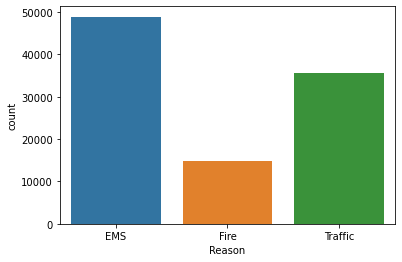

In [118]:
sns.countplot(x='Reason',data=df)

In [120]:
type(df['timeStamp'][0])

str

In [121]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [122]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [123]:
x=df['timeStamp'][0]
x

Timestamp('2015-12-10 17:40:00')

In [124]:
x.year

2015

In [125]:
x.month

12

In [129]:
x.day_name()

'Thursday'

In [130]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

In [131]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17


In [132]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [133]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12


In [134]:
df['Dayofweek']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [135]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3


<AxesSubplot:xlabel='Dayofweek', ylabel='count'>

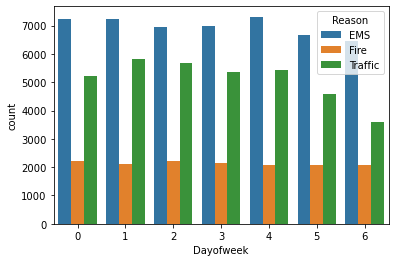

In [139]:
sns.countplot(x='Dayofweek',data=df,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

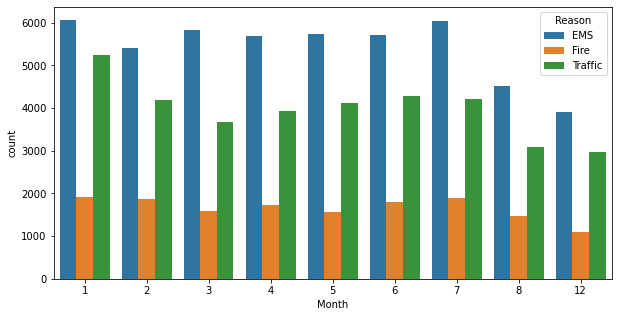

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',data=df,hue='Reason')

In [144]:
## 9,10,10 months are missing
df.groupby('month')

In [146]:
bymonth

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7916,7969,7969,7969


<AxesSubplot:xlabel='Month'>

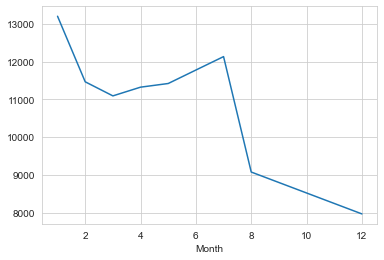

In [149]:
sns.set_style('whitegrid')
bymonth['twp'].plot()


In [150]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [151]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3,2015-12-10


In [152]:
df.groupby('Date')

In [153]:
byDate=df.groupby('Date').count()

In [154]:
byDate

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,447,446,445,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,328,327,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,357,352,357,357,357,357
2016-08-22,389,389,389,336,389,389,389,388,384,389,389,389,389


In [157]:
df[df['Reason']=='EMS'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


In [158]:
df[df['Reason']=='Fire'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,69,68,68,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,39,38,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,51,50,50,51,51,51,51


In [159]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,43,41,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,141,137,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,146,144,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,78,76,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,186,184,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,117,116,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,138,133,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,156,152,156,156,156,156


Text(0.5, 1.0, 'EMS')

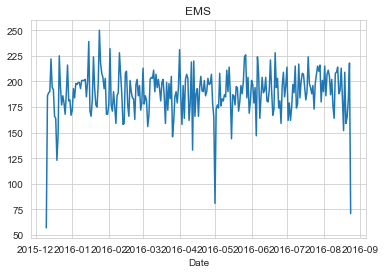

In [163]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

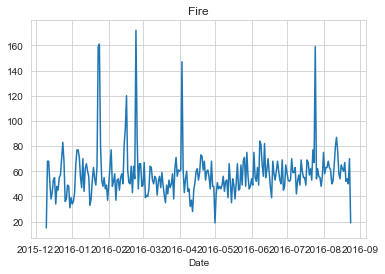

In [164]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

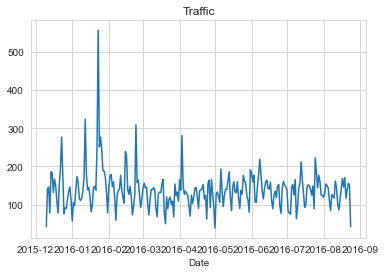

In [165]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

In [157]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt


In [158]:
df1=pd.read_csv('MegaMart_sales.csv')
df1

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-1029887,"Novimex Color Coded Labels, 5000 Label Set",0.0,26,7,2,Office Supplies,Labels
1,AZ-2011-107716,"Deflect-O Door Stop, Erganomic",0.0,85,15,2,Furniture,Furnishings
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines
4,AZ-2011-1362199,"Sanford Pens, Fluorescent",0.5,25,-11,4,Office Supplies,Art
5,AZ-2011-1114253,"Tenex Stacking Tray, Black",0.0,76,11,3,Furniture,Furnishings
6,AZ-2011-1116129,"Avery Binding Machine, Durable",0.0,252,15,5,Office Supplies,Binders
7,AZ-2011-1137571,"Stiletto Letter Opener, Easy Grip",0.0,90,17,3,Office Supplies,Supplies
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones
9,AZ-2011-122598,"Avery Removable Labels, Alphabetical",0.0,32,6,3,Office Supplies,Labels


In [159]:
df.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7
58,AZ-2011-176674,"Hoover Microwave, Red",0.1,1667,185,6,Office Supplies,Appliances,176674,6
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7


In [160]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      59 non-null     object 
 1   Product Name  59 non-null     object 
 2   Discount      59 non-null     float64
 3   Sales         59 non-null     int64  
 4   Profit        59 non-null     int64  
 5   Quantity      59 non-null     int64  
 6   Category      59 non-null     object 
 7   Sub-Category  59 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.8+ KB


In [161]:
df1.shape

(59, 8)

In [162]:
df1.describe()

,Discount,Sales,Profit,Quantity
count,59.000000,59.000000,59.000000,59.000000
mean,0.094915,300.830508,62.355932,3.898305
std,0.184226,403.498158,132.271894,2.233714
min,0.000000,10.000000,-98.000000,1.000000
25%,0.000000,38.500000,3.000000,2.000000
50%,0.000000,98.000000,15.000000,3.000000
75%,0.100000,403.000000,104.000000,5.000000
max,0.600000,1908.000000,820.000000,12.000000


In [163]:
df2=pd.read_csv('MegaMart_newsales.csv')
df2.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-1902971,"Wilson Jones Binding Machine, Clear",0.0,339,102,7,Office Supplies,Binders
1,AZ-2011-1916360,"Dania 3-Shelf Cabinet, Mobile",0.0,288,20,2,Furniture,Bookcases
2,AZ-2011-1916555,"Eldon Folders, Single Width",0.4,61,7,6,Office Supplies,Storage
3,AZ-2011-1930058,"Sanford Markers, Easy-Erase",0.0,71,1,3,Office Supplies,Art
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories


In [164]:
df2.shape

(9, 8)

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9 non-null      object 
 1   Product Name  9 non-null      object 
 2   Discount      9 non-null      float64
 3   Sales         9 non-null      int64  
 4   Profit        9 non-null      int64  
 5   Quantity      9 non-null      int64  
 6   Category      9 non-null      object 
 7   Sub-Category  9 non-null      object 
dtypes: float64(1), int64(3), object(4)
memory usage: 704.0+ bytes


In [166]:
df2.describe()

,Discount,Sales,Profit,Quantity
count,9.000000,9.000000,9.000000,9.000000
mean,0.044444,141.000000,30.000000,3.888889
std,0.133333,102.701022,31.622777,1.833333
min,0.000000,52.000000,1.000000,2.000000
25%,0.000000,71.000000,12.000000,2.000000
50%,0.000000,97.000000,19.000000,4.000000
75%,0.000000,136.000000,40.000000,5.000000
max,0.400000,339.000000,102.000000,7.000000


In [167]:
df=pd.concat([df1,df2],axis=0)

In [168]:
df

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-1029887,"Novimex Color Coded Labels, 5000 Label Set",0.0,26,7,2,Office Supplies,Labels
1,AZ-2011-107716,"Deflect-O Door Stop, Erganomic",0.0,85,15,2,Furniture,Furnishings
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines
4,AZ-2011-1362199,"Sanford Pens, Fluorescent",0.5,25,-11,4,Office Supplies,Art
...,...,...,...,...,...,...,...,...
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories
5,AZ-2011-1976919,"Boston Markers, Blue",0.0,132,54,5,Office Supplies,Art
6,AZ-2011-2001312,"Avery Binding Machine, Clear",0.0,97,12,2,Office Supplies,Binders
7,AZ-2011-2002251,"SanDisk Computer Printout Paper, 8.5 x 11",0.0,136,15,4,Office Supplies,Paper


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      68 non-null     object 
 1   Product Name  68 non-null     object 
 2   Discount      68 non-null     float64
 3   Sales         68 non-null     int64  
 4   Profit        68 non-null     int64  
 5   Quantity      68 non-null     int64  
 6   Category      68 non-null     object 
 7   Sub-Category  68 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.8+ KB


In [170]:
df.shape

(68, 8)

In [171]:
df[df['Category']=="Office Supplies"]['Sales'].sum()

7970

In [172]:
df.drop_duplicates(subset=None,keep="first",inplace=True)


In [173]:
df[df['Category']=="Office Supplies"]['Sales'].sum()

6964

In [174]:
df.groupby(by=['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases        308
                 Chairs           -49
                 Furnishings       74
Office Supplies  Appliances       229
                 Art              275
                 Binders          156
                 Envelopes         35
                 Fasteners         10
                 Labels            30
                 Paper             15
                 Storage          192
                 Supplies         103
Technology       Accessories      215
                 Copiers            0
                 Machines         168
                 Phones          1618
Name: Profit, dtype: int64

In [175]:
pd.pivot_table(df,index=['Category','Sub-Category'],values='Profit',aggfunc='sum')

Profit
Category        Sub-Category        
Furniture       Bookcases        308
                Chairs           -49
                Furnishings       74
Office Supplies Appliances       229
                Art              275
                Binders          156
                Envelopes         35
                Fasteners         10
                Labels            30
                Paper             15
                Storage          192
                Supplies         103
Technology      Accessories      215
                Copiers            0
                Machines         168
                Phones          1618

In [176]:
df.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-1029887,"Novimex Color Coded Labels, 5000 Label Set",0.0,26,7,2,Office Supplies,Labels
1,AZ-2011-107716,"Deflect-O Door Stop, Erganomic",0.0,85,15,2,Furniture,Furnishings
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines
4,AZ-2011-1362199,"Sanford Pens, Fluorescent",0.5,25,-11,4,Office Supplies,Art


In [177]:
def Order_ID(order_id):
    return order_id.split('-')[2]


In [178]:
df['order No']=df['Order ID'].apply(Order_ID)
df

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No
0,AZ-2011-1029887,"Novimex Color Coded Labels, 5000 Label Set",0.0,26,7,2,Office Supplies,Labels,1029887
1,AZ-2011-107716,"Deflect-O Door Stop, Erganomic",0.0,85,15,2,Furniture,Furnishings,107716
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644
4,AZ-2011-1362199,"Sanford Pens, Fluorescent",0.5,25,-11,4,Office Supplies,Art,1362199
...,...,...,...,...,...,...,...,...,...
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754
5,AZ-2011-1976919,"Boston Markers, Blue",0.0,132,54,5,Office Supplies,Art,1976919
6,AZ-2011-2001312,"Avery Binding Machine, Clear",0.0,97,12,2,Office Supplies,Binders,2001312
7,AZ-2011-2002251,"SanDisk Computer Printout Paper, 8.5 x 11",0.0,136,15,4,Office Supplies,Paper,2002251


In [179]:
df['no of digits']=df['order No'].apply(len)

In [180]:
df

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits
0,AZ-2011-1029887,"Novimex Color Coded Labels, 5000 Label Set",0.0,26,7,2,Office Supplies,Labels,1029887,7
1,AZ-2011-107716,"Deflect-O Door Stop, Erganomic",0.0,85,15,2,Furniture,Furnishings,107716,6
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704,7
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7
4,AZ-2011-1362199,"Sanford Pens, Fluorescent",0.5,25,-11,4,Office Supplies,Art,1362199,7
...,...,...,...,...,...,...,...,...,...,...
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754,7
5,AZ-2011-1976919,"Boston Markers, Blue",0.0,132,54,5,Office Supplies,Art,1976919,7
6,AZ-2011-2001312,"Avery Binding Machine, Clear",0.0,97,12,2,Office Supplies,Binders,2001312,7
7,AZ-2011-2002251,"SanDisk Computer Printout Paper, 8.5 x 11",0.0,136,15,4,Office Supplies,Paper,2002251,7


In [181]:
df['no of digits'].value_counts()

7    54
6     7
Name: no of digits, dtype: int64

In [182]:
# 7 is the order id are  there in orderset

In [183]:
df3=df.sort_values(by="Sales",ascending=False).head()
df3['Category'].value_counts()

Technology         4
Office Supplies    1
Name: Category, dtype: int64

In [184]:
x=df[(df['Sales']>250) & (df['Profit']>50)]
x.sort_values(by=['Sales','Profit'],ascending=False).head(4)

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7
58,AZ-2011-176674,"Hoover Microwave, Red",0.1,1667,185,6,Office Supplies,Appliances,176674,6
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7


In [185]:
y=df[df['Profit']>0]
x=y[y['Category']=="Technology"]
x

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704,7
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7
33,AZ-2011-1445262,"Apple Smart Phone, Cordless",0.0,636,140,1,Technology,Phones,1445262,7
39,AZ-2011-1536006,"Logitech Keyboard, Programmable",0.0,666,66,9,Technology,Accessories,1536006,7
52,AZ-2011-1722024,"Cisco Audio Dock, VoIP",0.0,364,142,2,Technology,Phones,1722024,7
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754,7


In [187]:
import warnings 
warnings.filterwarnings('ignore')

In [189]:
x['Profit per unit']=x['Profit']/x['Quantity']
x

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits,Profit per unit
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704,7,15.571429
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7,56.000000
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7,25.000000
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7,26.333333
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7,273.333333
33,AZ-2011-1445262,"Apple Smart Phone, Cordless",0.0,636,140,1,Technology,Phones,1445262,7,140.000000
39,AZ-2011-1536006,"Logitech Keyboard, Programmable",0.0,666,66,9,Technology,Accessories,1536006,7,7.333333
52,AZ-2011-1722024,"Cisco Audio Dock, VoIP",0.0,364,142,2,Technology,Phones,1722024,7,71.000000
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754,7,20.000000


In [191]:
x.sort_values(by=['Profit per unit'])

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,order No,no of digits,Profit per unit
39,AZ-2011-1536006,"Logitech Keyboard, Programmable",0.0,666,66,9,Technology,Accessories,1536006,7,7.333333
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704,7,15.571429
4,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754,7,20.000000
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7,25.000000
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7,26.333333
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7,56.000000
52,AZ-2011-1722024,"Cisco Audio Dock, VoIP",0.0,364,142,2,Technology,Phones,1722024,7,71.000000
33,AZ-2011-1445262,"Apple Smart Phone, Cordless",0.0,636,140,1,Technology,Phones,1445262,7,140.000000
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7,273.333333


# .Project#

In [200]:
!pip install pandas_datareader
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import datetime
from pandas_datareader import data,wb




In [201]:
#in thes project we will focus on EDA (Exploratoyydata analysics of

In [204]:
import datetime
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [205]:
BAC=data.DataReader("BAC","yahoo",start,end)
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.777504
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.418781
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.461830
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.411613
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.433132
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.281428
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.157548
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.290279


In [206]:
BAC['Close'].max()

54.900001525878906

In [207]:
C=data.DataReader("C","yahoo",start,end)
C

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,365.387604
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,358.641693
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,360.420929
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,360.420929
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,358.715790
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,45.319019
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,45.035301
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,45.551174


In [208]:
C['Close'].max()

564.0999755859375

In [209]:
#Goldman sachs
GS=data.DataReader("GS","yahoo",start,end)
GS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,103.255722
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,101.829506
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,101.789459
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,103.231697
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,104.473587
...,...,...,...,...,...,...
2015-12-24,183.169998,182.020004,182.270004,182.470001,1107600.0,163.608719
2015-12-28,181.929993,179.839996,181.770004,181.619995,1723300.0,162.846573
2015-12-29,184.179993,182.500000,182.820007,183.529999,1848900.0,164.559113


In [210]:
#JPMorgan chase

JPM=data.DataReader("JPM","yahoo",start,end)
JPM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.345470
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.193420
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.272745
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.457863
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,26.887590
...,...,...,...,...,...,...
2015-12-24,66.889999,66.320000,66.620003,66.599998,4468200.0,56.105709
2015-12-28,66.449997,65.709999,66.290001,66.379997,6610600.0,55.920387
2015-12-29,67.300003,66.739998,66.839996,67.070000,9820800.0,56.501648


In [212]:
#Morgan stanly

MS=data.DataReader("MS","yahoo",start,end)
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,33.464500
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,33.487465
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,33.579285
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,33.613720
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,33.969543
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,25.991234
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,25.743170
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,26.047251


In [214]:

#Wells Forgo
WFC=data.DataReader("WFC","yahoo",start,end)
WFC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.353485
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.117414
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.095079
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.213118
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.209923
...,...,...,...,...,...,...
2015-12-24,55.090000,54.709999,54.970001,54.820000,4999400.0,45.552620
2015-12-28,54.779999,54.169998,54.549999,54.680000,8288800.0,45.436295
2015-12-29,55.349998,54.990002,55.110001,55.290001,7894900.0,45.943165


In [218]:
df=data.DataReader(["BAC""C","GS","JPM","MS","WFC"],"yahoo",start,end)
df.head()

Attributes   Adj Close                                             Close  \
Symbols             GS        JPM         MS        WFC BACC          GS   
Date                                                                       
2006-01-03  103.255707  26.345469  33.464504  20.353485  NaN  128.869995   
2006-01-04  101.829521  26.193428  33.487457  20.117413  NaN  127.089996   
2006-01-05  101.789482  26.272762  33.579269  20.095079  NaN  127.040001   
2006-01-06  103.231697  26.457870  33.613720  20.213125  NaN  128.839996   
2006-01-09  104.473625  26.887606  33.969543  20.209929  NaN  130.389999   

Attributes                                        ...        Open             \
Symbols           JPM         MS        WFC BACC  ...          GS        JPM   
Date                                              ...                          
2006-01-03  40.189999  58.310001  31.900000  NaN  ...  126.699997  39.830002   
2006-01-04  39.619999  58.349998  31.530001  NaN  ...  127.349998  39.779999   
2006-01-05  39.740002  58.509998  31.495001  NaN  ...  126.000000  39.610001   
2006-01-06  40.020000  58.570000  31.680000  NaN  ...  127.290001  39.919998   
2006-01-09  40.669998  59.189999  31.674999  NaN  ...  128.500000  39.880001   

Attributes                                Volume                         \
Symbols            MS        WFC BACC         GS         JPM         MS   
Date                                                                      
2006-01-03  57.169998  31.600000  NaN  6188700.0  12838600.0  5377000.0   
2006-01-04  58.700001  31.799999  NaN  4861600.0  13491500.0  7977800.0   
2006-01-05  58.549999  31.500000  NaN  3717400.0   8109400.0  5778000.0   
2006-01-06  58.770000  31.580000  NaN  4319600.0   7966900.0  6889800.0   
2006-01-09  58.630001  31.674999  NaN  4723500.0  16575200.0  4144500.0   

Attributes                   
Symbols            WFC BACC  
Date                         
2006-01-03  11016400.0  NaN  
2006-01-04  10870000.0  NaN  
2006-01-05  10158000.0  NaN  
2006-01-06   8403800.0  NaN  
2006-01-09   5619600.0  NaN  

[5 rows x 30 columns]

In [223]:

tickers=["BAC","C","GS","JPM","MS","WFC"]

In [224]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.777504   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.418781   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.461830   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.411613   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.433132   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  33.464500  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  33.487465  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  33.579285  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  33.613720  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  33.969543  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353485  
2006-01-04  31.530001  10870000.0  20.117414  
2006-01-05  31.495001  10158000.0  20.095079  
2006-01-06  31.680000   8403800.0  20.213118  
2006-01-09  31.674999   5619600.0  20.209923  

[5 rows x 36 columns]

In [226]:
bank_stocks.columns.names=['Bank Tickers','Stock Info']
bank_stocks.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    33.777504  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    33.418781  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    33.461830  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    33.411613  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    33.433132  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  33.464500  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  33.487465  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  33.579285  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  33.613720  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  33.969543  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.353485  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.117414  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.095079  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.213118  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.209923  

[5 rows x 36 columns]

In [227]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [228]:
returns=pd.DataFrame()
returns

""


In [229]:
import pandas as pd                                                                          

In [230]:
tickers=["BAC","C","GS","JPM","MS","WFC"]

for tick in tickers:
    returns [tick + 'Return']=bank_stocks[tick]['Close'].pct_change()
    

In [231]:
returns

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [233]:
returns[1:]

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


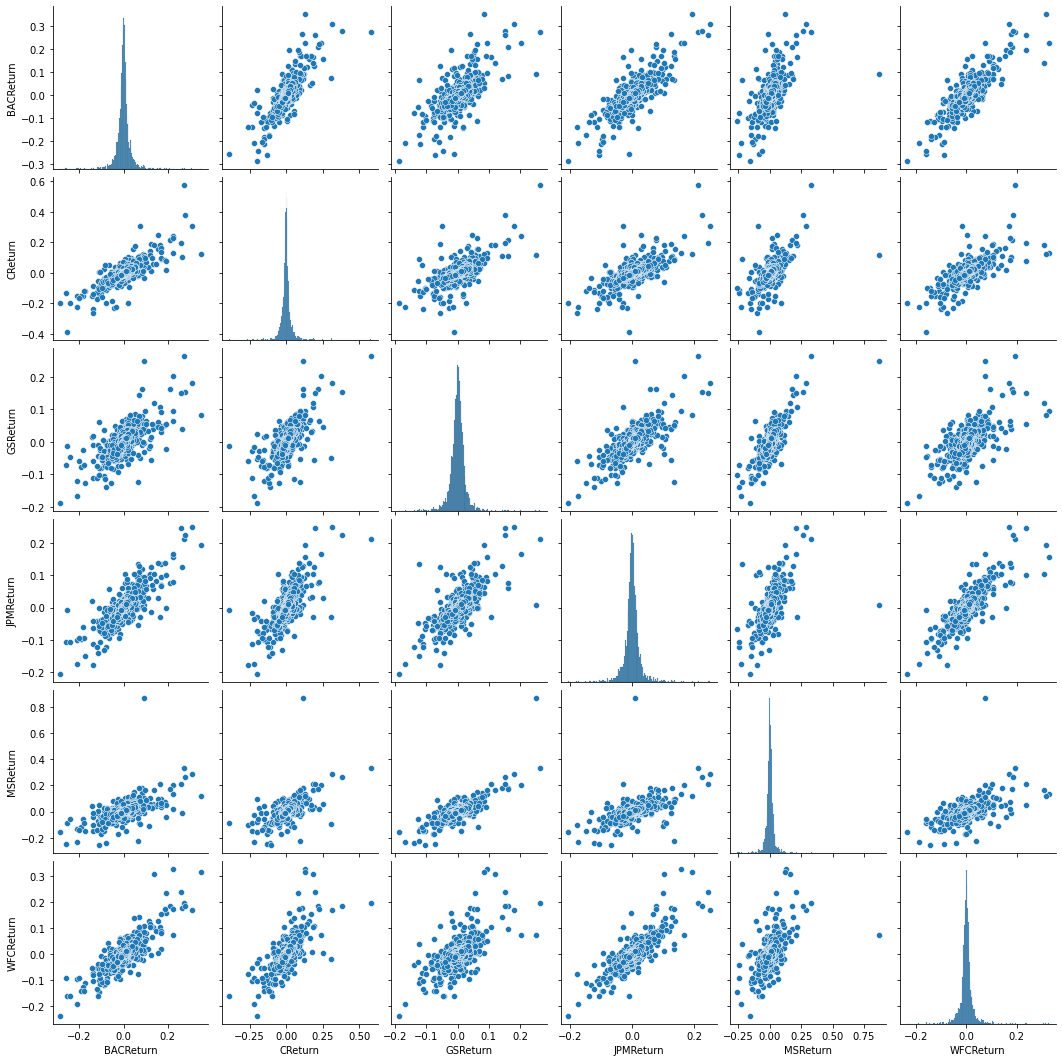

In [234]:
import seaborn as sns
sns.pairplot(returns[1:])

In [236]:
# MS Stocks crashes as seen in fig

In [237]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [238]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [ ]:
#JPM have largest drop on 20/01/2009 and biggest goin  day 

In [239]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [240]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [241]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

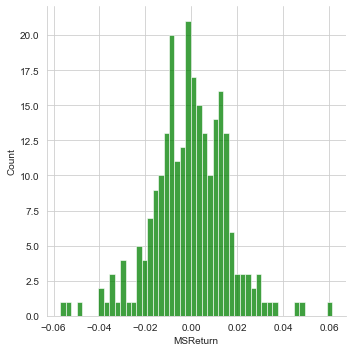

In [243]:
sns.set_style('whitegrid')
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=50)

In [244]:
#it deviate 0.06 from the avrage or mean value

In [245]:
# 2008 returns returns.loc['2008-01-01':'2008-12-31'].std()

BACReturn    0.062934
CReturn      0.073523
GSReturn     0.050015
JPMReturn    0.053134
MSReturn     0.087604
WFCReturn    0.052439
dtype: float64

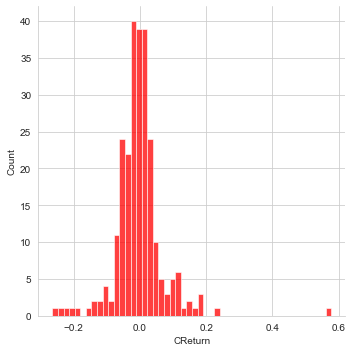

In [247]:
sns.set_style('whitegrid')
sns.displot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=50)

In [248]:
# #it deviate 0.06 from the avrage or mean value  right skewed distribution

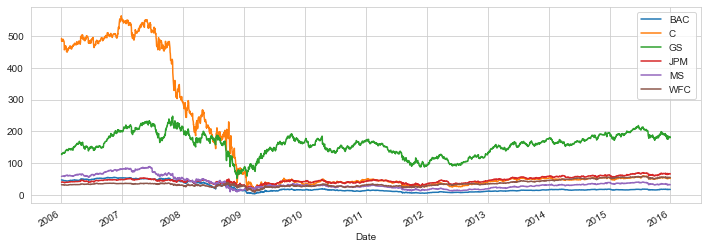

In [255]:
import matplotlib.pyplot as plt 
for tick  in tickers:
        bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
        plt.legend()

In [258]:
!pip install plotly


In [259]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=3cc36bfe260c2c72396571213b79978bd1b402063a7766fdfd96a6219aeef159
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [263]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=4da0497017b6a557b3494ffb4175cb7fb2bf5c57a5d2dded95a7224ac9a97090
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [264]:
import plotly
import cufflinks as cf
cf.go_offline()

In [265]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).iplot()